# Heart Attack Prediction

**Importing Libraries and Data**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline 

In [2]:
#os.getcwd()

In [39]:
df = pd.read_csv('/Users/ankushv/PycharmProjects/Heart-Attack-Prediction/Data/heart-attack.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


## Data Cleansing and Type

In [40]:
print(df.isnull().sum())

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64


In [5]:
df = df.dropna()

In [6]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.00000,301.000000
mean,54.451827,0.681063,131.714286,246.936877,0.146179,0.990033,149.700997,0.325581,1.043189,1.601329,0.69103,0.458472
std,9.067258,0.466841,17.655729,51.859869,0.353874,0.994937,22.860817,0.469372,1.163384,0.616872,0.94915,0.499102
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.00000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.00000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.00000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     301 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.3+ KB


## Data Visualisation


In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

In [9]:
import dtale
dtale.show(df, ignore_duplicate=True)


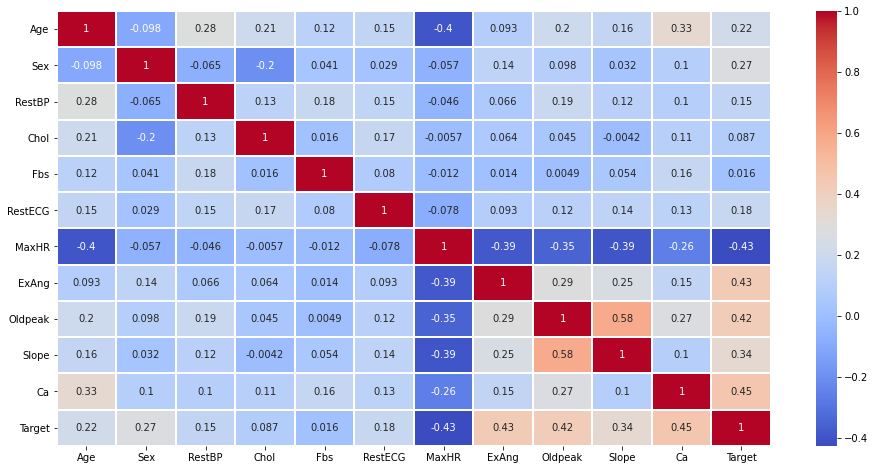

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True, linewidth = 1)
plt.show()

**AGE Analysis**

In [27]:
df['Age'].value_counts().head()

58    19
57    17
54    16
59    14
51    12
Name: Age, dtype: int64

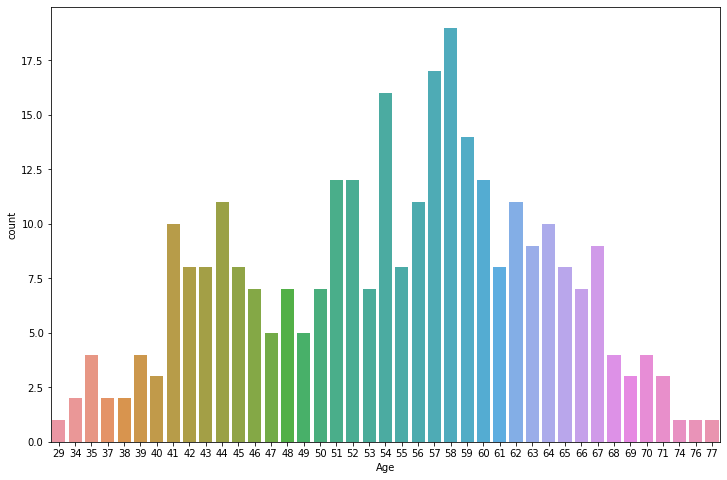

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age', data=df)
plt.show()

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



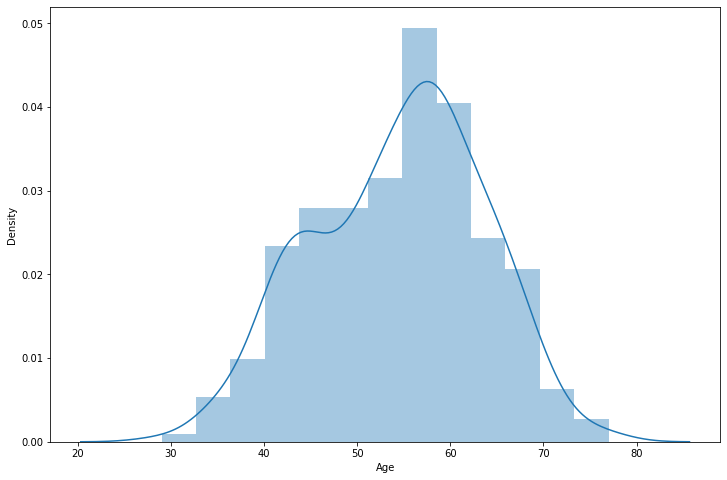

In [17]:
plt.figure(figsize=(12,8))
sns.distplot(df['Age'])
plt.show()


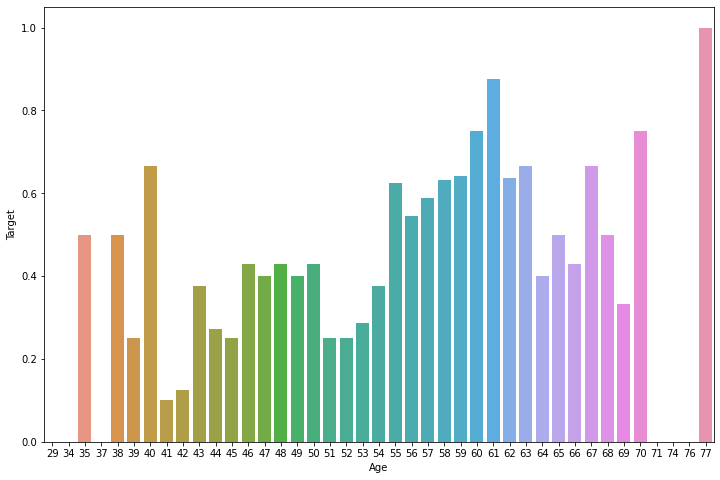

In [19]:
avg = df[["Age", "Target"]].groupby(['Age'], as_index=False).mean()
plt.figure(figsize=(12,8))
sns.barplot(x='Age', y='Target', data=avg)
plt.show()


In [47]:
def category(Age):
    if Age >= 29 and Age <= 35:
        return "Young Adults"
    elif Age >=35 and Age <= 50:
        return "Middle-aged Adults"
    elif Age >= 50 and Age <= 60:
        return "Senior Adults"
    elif Age >= 60:
        return "Retired"
    else:
        return "None"

In [48]:
df['Category'] = df['Age'].apply(category)

In [45]:
def gender(Sex):
    if Sex == 0:
        return "Female"
    else:
        return "Male"

In [46]:
df['Gender'] = df['Sex'].apply(gender)

**Cholestrol Analysis**


/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



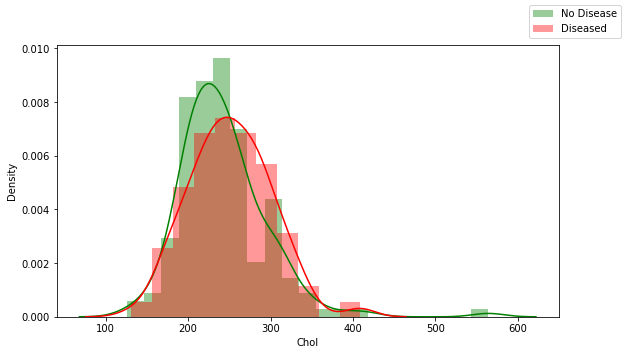

In [56]:
ax, figure = plt.subplots(figsize = [9,5])
sns.distplot(df[df['Target'] == 0].Chol, label="No Disease", color="g");
sns.distplot(df[df['Target'] == 1].Chol, label="Diseased", color="r");
ax.legend()
plt.show()

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/ankushv/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



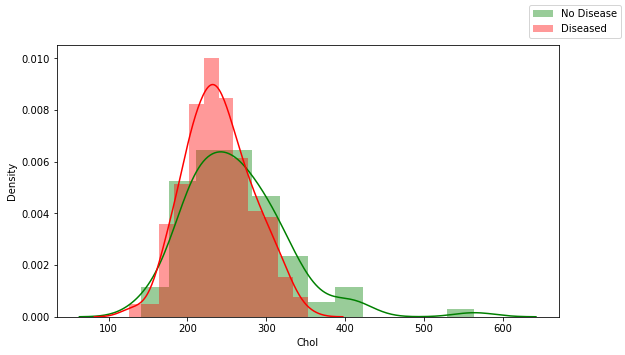

In [57]:
ax, figure = plt.subplots(figsize = [9,5])
sns.distplot(df[df['Gender'] == "Female"].Chol, label="No Disease", color="g");
sns.distplot(df[df['Gender'] == "Male"].Chol, label="Diseased", color="r");
ax.legend()
plt.show()

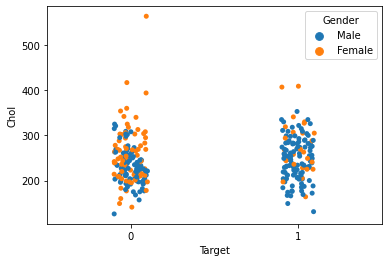

In [54]:
sns.stripplot(x="Target", y="Chol", hue="Gender",
              data = df, jitter=True);

<AxesSubplot:xlabel='Target', ylabel='Chol'>

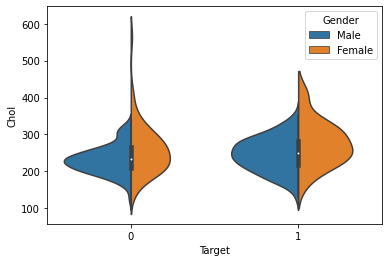

In [55]:
sns.violinplot(x="Target", y="Chol", hue="Gender",
               data=df, split=True)

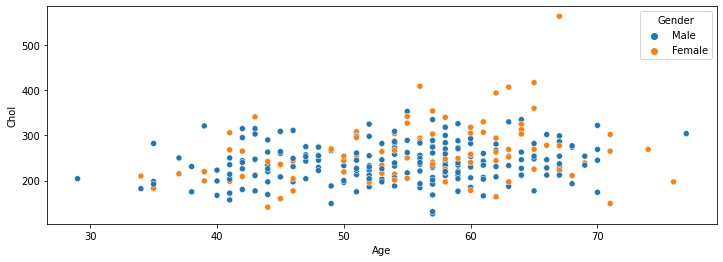

In [62]:
plt.figure(figsize=(12,4))
sns.scatterplot(x="Age", y="Chol", hue="Gender", data=df)
plt.show()

In [58]:
df.groupby('Age')['Chol'].mean()


Age
29    204.000000
34    196.000000
35    213.750000
37    232.500000
38    203.000000
39    239.750000
40    196.333333
41    220.700000
42    246.750000
43    256.750000
44    221.363636
45    247.375000
46    230.285714
47    246.400000
48    250.857143
49    228.600000
50    227.000000
51    258.666667
52    228.230769
53    233.500000
54    253.312500
55    280.625000
56    259.363636
57    238.529412
58    254.526316
59    239.857143
60    250.500000
61    243.750000
62    256.636364
63    258.222222
64    274.400000
65    279.000000
66    245.714286
67    286.777778
68    238.750000
69    242.333333
70    252.500000
71    238.666667
74    269.000000
76    197.000000
77    304.000000
Name: Chol, dtype: float64

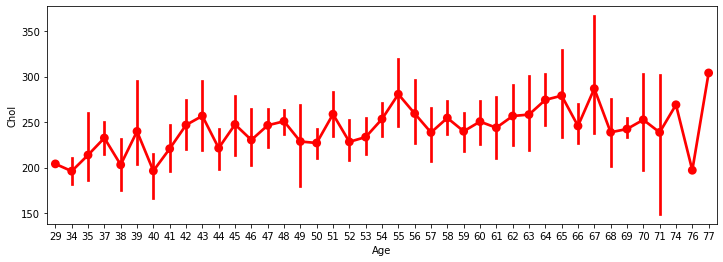

In [61]:
plt.figure(figsize=(12,4))
sns.pointplot(x="Age", y="Chol", data=df, color='r')
plt.show()

**ChestPain Analysis**

In [63]:
df['ChestPain'].value_counts()/len(df)*100

asymptomatic    47.524752
nonanginal      28.382838
nontypical      16.501650
typical          7.590759
Name: ChestPain, dtype: float64

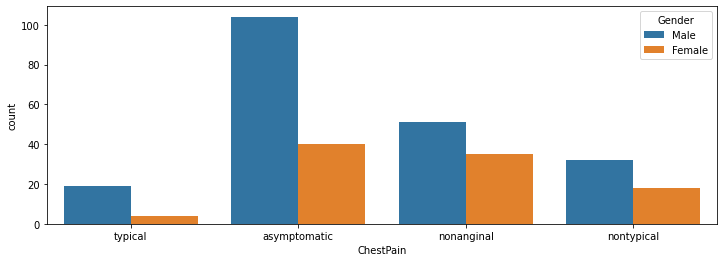

In [66]:
plt.figure(figsize=(12,4))
sns.countplot(x="ChestPain", hue="Gender", data=df)
plt.show()

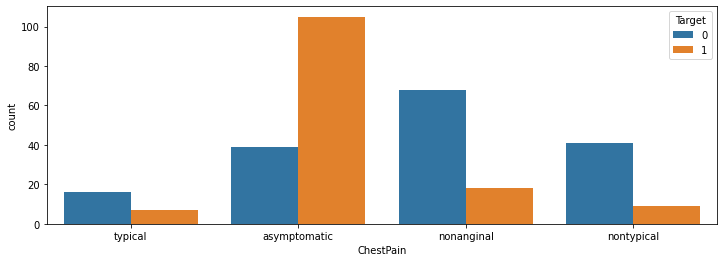

In [67]:
plt.figure(figsize=(12,4))
sns.countplot(x="ChestPain", hue="Target", data=df)
plt.show()
